# 1. 이미지 인식의 꽃 - CNN익히기 


### - 데이터 전처리 

In [2]:
from tensorflow.keras.datasets import mnist

import numpy as np
import sys
import tensorflow as tf
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)
(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()

* 케라스의 MNIST 데이터는 총 70,000개의 이미지 중 60,000개를 학습용으로, 10,000개를 테스트용으로 구분해둔다. 
* X에는 각 이미지를 28x28 픽셀의 데이터를 행렬로 표현한 데이터이며, Y에는 각각의 데이터가 표현하는 숫자를 저장한다. 

In [3]:
print('학습 셋 이미지 수 : %d 개 '%(X_train.shape[0]))
print('테스트 셋 이미지 수 : %d개'%(X_test.shape[0]))

학습 셋 이미지 수 : 60000 개 
테스트 셋 이미지 수 : 10000개


In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


<Figure size 640x480 with 1 Axes>

* cmap greys 옵션을 지정해 흑백으로 출력하는데, 각 셋의 이미지는 28x28행렬에 숫자가 표현된 형식이다. 즉 가로 28x세로 28 = 총 784개의 픽셀로 이루어진 이미지를 행렬로 표현한 것으로, 색의 밝기가 0~255의 숫자중하나로 각 행렬의 데이터포인트에 들어가게 된다.  

In [5]:
'''for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')'''

"for x in X_train[0]:\n    for i in x:\n        sys.stdout.write('%d\t' %i)\n    sys.stdout.write('\n')"

* 주어진 2차원배열을 1차원 배열로 바꿔줘야 하기 때문에 reshape() 함수를 사용한다. 
* reshape(총 샘플 수, 1차원 속성의 수) 형식으로 지정한다. 

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)

* 케라스에서는 데이터를 0~1사이의 값으로 변환 후 구동할때 최적의 성능을 보임으로 각 값을 데이터의 최대값으로 나눠서 분산의 정도를 나눠준다.

In [7]:
X_train = X_train.astype('float64')
X_train = X_train/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

In [8]:
print('class :%d' %(Y_class_train[0]))

class :5


* 아이 리스 품종 예측시, 딥러닝의 분류문제를 해결하기 위해 원-핫 인코딩을 적용해야 한다,
* 즉 0~9 까지 정수형 값을 갖는 현재 형태에서 0또는 1로 만 조합된 벡터로 값을 수정해주어야 한다. 

#### - binary 화

In [9]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

Using TensorFlow backend.


In [10]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


* 원핫인코딩이 적용되어, 타겟오브젝트 데이터를 정제하였고, X(feature)데이터를 분산화, 1차원행렬화(reshape)해줌으로써 딥러닝을 수행할 준비를 마친다. 

### - 딥러닝 기본 프레임 만들기 

* 총 784개의 속성이 있고, 10개의 클래스가 있으니 다음과 같이 딥러닝 프레임을 만들어준다. 

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#인공 신경망 모델 만듬
model = Sequential()
#멤버함수 add()를 이용해 인공지능 계층 추가 - Relu
model.add(Dense(512, input_dim = 784, activation = 'relu'))
# 시그모이드 계층 추가 
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

* 모델의 실행에 앞서 모델의 성과를 저장하고, 모델 최적화 단계에서 학습을 자동 중단 하게끔 설정한다. 10회 이상 모델의 성과 향상이 없으면 자동으로 학습 중단 

In [12]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

* 샘플 200개를 모두 30 번 실행하게끔 설정하고, 테스트 셋에는 최종 모델의 성과를 측정하여 그 값을 출력한다.

In [13]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size = 200, verbose = 0, 
                    callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model/01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10198, saving model to ./model/02-0.1020.hdf5

Epoch 00003: val_loss improved from 0.10198 to 0.08880, saving model to ./model/03-0.0888.hdf5

Epoch 00004: val_loss improved from 0.08880 to 0.07830, saving model to ./model/04-0.0783.hdf5

Epoch 00005: val_loss improved from 0.07830 to 0.07461, saving model to ./model/05-0.0746.hdf5

Epoch 00006: val_loss improved from 0.07461 to 0.06749, saving model to ./model/06-0.0675.hdf5

Epoch 00007: val_loss improved from 0.06749 to 0.06510, saving model to ./model/07-0.0651.hdf5

Epoch 00008: val_loss improved from 0.06510 to 0.06258, saving model to ./model/08-0.0626.hdf5

Epoch 00009: val_loss did not improve from 0.06258

Epoch 00010: val_loss improved from 0.06258 to 0.06238, saving model to ./model/10-0.0624.hdf5

Epoch 00011: val_loss did not improve from 0.06238

Epoch 00012: val_loss did not impro

In [14]:
print('test Accuracy : %.4f'%(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9840
test Accuracy : 0.9840


### - 실행결과 그래프로 표현하기 
* 학습 셋의 오차와 테스트 셋의 오차를 그래프로 나타내기 

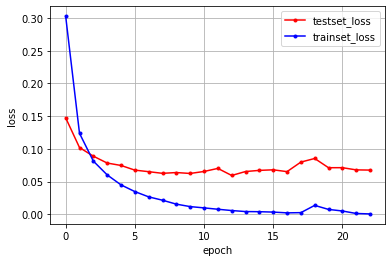

In [15]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

#학습셋의 오차 
y_loss = history.history['loss']

#그래프로 ㅠㅛ현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'trainset_loss')

#그래프에 그리드를 주고 레이블 표시 
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* 학습셋에 대한 오차가 지속적으로 줄고, 테스트 셋의 과적합이 일어나기전에 끝낸 모습이다. 

#### - 지금 까지는 하나의 은닉층을 둔 아주 단순한 모델이지만, 어떤 층을 추가하냐에 따라 성능이 좋아 질 수 있다.  지금부터 기본 딥러닝 프레임에 이미지 인식 분야에서 강력한 성능을 보이는 CNN(Convolutional Neural Netword,CNN)을 얹어보겠다. 

# 2. CNN

### - 컨벌루젼 신경망 모델링 -CNN layer 더해주기 
* CNN을 얹기 위해선 Conv2D를 add 해주어야 한다. 

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import tensorflow as tf

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

* Conv2D 첫번째 인자 -> 마스크를 몇개 적용하는가? 
* 두 번째 인자 (kernel_size) -> 마스크의 크기(n x n)(행렬)
* 세 번째 인자 -> 인풋으로 들어갈 데이터의 shape(우리는 지금 28x28픽셀의 이미지를 데이터 화 하여 인풋) input_shape = (행,열, 색상 또는 흑백) 흑백은 1이다. 색상은 3
* activation fn => 활성화 함수 

### - 맥스풀링 layer
* 앞서 구현한 컨볼루션 층을 통해 이미지의 특징을 도출하였고, 하지만 그 결과가 여적히 크고 복잡하면 이를 다시한번 축소해줄 필요가 있다. 이과정을 풀링 또는 서브 샘플링이라고 한다. 
* 이러한 풀링 기법 중, 정해진 구역에서 최댓값을 뽑는 맥스풀링과 평균값만 뽑는 평균 풀링이 있다. 맥스풀링이 보편적 
* 불필요한 정보를 간추려 주기 때문에 CNN레이어에서 풀링 층을 쌓아주는게 효과적이다. 
* MaxPooling2D() 함수를 이용하여 적용한다. 

In [18]:
model.add(MaxPool2D(pool_size = 2))
# 2로 정하면 전체의 콘볼루션 크기가 절반으로 줄어들게 된다. 

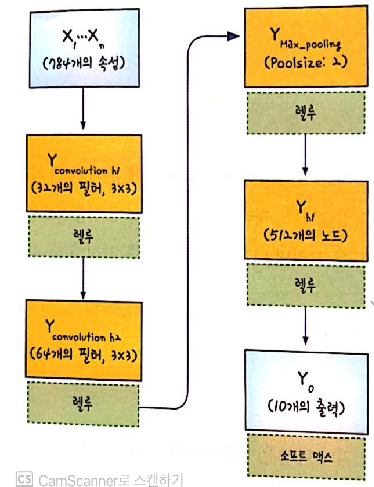

#### - 맥스풀링 - 드롭아웃, 플래튼
* 노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 좋아지는것이 아니다 -과적합의 의미 
* 따라 딥러닝 학습을 실행할 때, 가장 중요한 것이 과적합을 얼마나 효과적으로 피해가는지 달려있다해도 과언이 아니다. 
* 따라서 그동안 이러한 과정을 도와주는 기법이 연구되어 왔다 가장효과적인 기법이 -드롭아웃
* 드롭아웃은 은닉층에 배치된 노드중 일부를 임의로 꺼주는것 
* 랜덤하게 노드를 끔으로서 학습데이터에 지나치게 치우져서 학습되는 과적합을 방지할 수 있다. 

In [19]:
model.add(Dropout(0.25)) # 25%의 노드를 꺼준다(랜덤하게~)

* 주의할 점은 컨볼루션 층이나맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다룬다. 이를 1차원 배열로 바꿔줘야 활성화 함수가 있는 층에서 사용할수 있다. 
* 따라서 Flatten()함수를 사용해 2차원 배열을 1차원으로 바꿔준다. 

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

* 은닉층을 더쌓아준후, softmax활성화 함수를 거쳐 노드를 출력값과 같게 (10개)만든 후에 컴파일 해준다. 

In [22]:
(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()

In [23]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') /255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') /255
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)


In [25]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size = 200, verbose = 0, 
                    callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05720, saving model to ./model/01-0.0572.hdf5

Epoch 00002: val_loss improved from 0.05720 to 0.03900, saving model to ./model/02-0.0390.hdf5

Epoch 00003: val_loss did not improve from 0.03900

Epoch 00004: val_loss improved from 0.03900 to 0.03249, saving model to ./model/04-0.0325.hdf5

Epoch 00005: val_loss improved from 0.03249 to 0.03152, saving model to ./model/05-0.0315.hdf5

Epoch 00006: val_loss did not improve from 0.03152

Epoch 00007: val_loss improved from 0.03152 to 0.02761, saving model to ./model/07-0.0276.hdf5

Epoch 00008: val_loss did not improve from 0.02761

Epoch 00009: val_loss did not improve from 0.02761

Epoch 00010: val_loss did not improve from 0.02761

Epoch 00011: val_loss did not improve from 0.02761

Epoch 00012: val_loss improved from 0.02761 to 0.02727, saving model to ./model/12-0.0273.hdf5

Epoch 00013: val_loss improved from 0.02727 to 0.02563, saving model to ./model/13-0.0256.hdf5

Epoch 00014: val_lo

In [26]:
print('test Accuracy : %.4f'%(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.0284 - accuracy: 0.9940
test Accuracy : 0.9940


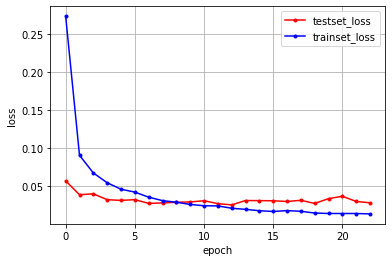

In [27]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

#학습셋의 오차 
y_loss = history.history['loss']

#그래프로 ㅠㅛ현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'trainset_loss')

#그래프에 그리드를 주고 레이블 표시 
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

https://www.kaggle.com/c/dogs-vs-cats/data
https://developers.naver.com/main

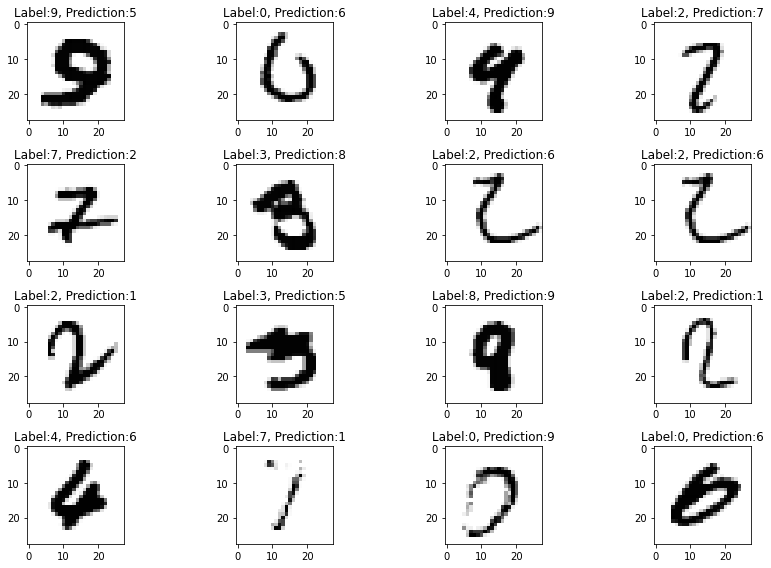

In [28]:
import random
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(Y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()



In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

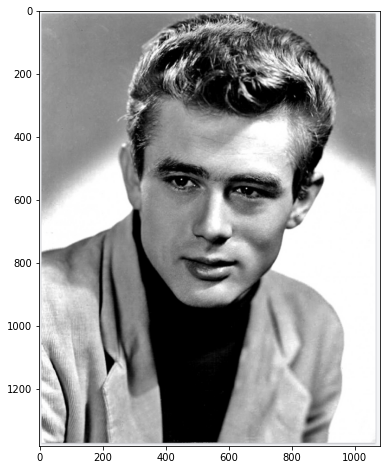

In [30]:
img=mpimg.imread("../data/face_test_01.jpg")
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [128]:
import requests
client_id="ecP62hGiXJwVbQt8vvKo"
client_secret="oVTHQQ3s_P"
url="https://openapi.naver.com/v1/vision/celebrity"

In [129]:
files={"image":open("../data/웅.jpg","rb")}
headers={"X-Naver-Client-Id":client_id,
        "X-Naver-Client-Secret":client_secret}
response=requests.post(url,files=files,headers=headers)

In [130]:
#json은 java Script object
import json
parsed=json.loads(response.text)
print(json.dumps(parsed,indent=4,sort_keys=False,ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 696,
            "height": 961
        },
        "faceCount": 2
    },
    "faces": [
        {
            "celebrity": {
                "value": "안재홍",
                "confidence": 0.01
            }
        },
        {
            "celebrity": {
                "value": "진지희",
                "confidence": 0.729153
            }
        }
    ]
}


In [35]:
url="https://openapi.naver.com/v1/vision/face"
files={"image":open("../data/face_test_01.jpg","rb")}
headers={"X-Naver-Client-Id":client_id,
        "X-Naver-Client-Secret":client_secret}
response=requests.post(url,files=files,headers=headers)
parsed=json.loads(response.text)
print(json.dumps(parsed,indent=4,sort_keys=False,ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1082,
            "height": 1380
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 328,
                "y": 450,
                "width": 458,
                "height": 458
            },
            "landmark": {
                "leftEye": {
                    "x": 449,
                    "y": 532
                },
                "rightEye": {
                    "x": 666,
                    "y": 568
                },
                "nose": {
                    "x": 539,
                    "y": 694
                },
                "leftMouth": {
                    "x": 448,
                    "y": 782
                },
                "rightMouth": {
                    "x": 636,
                    "y": 799
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999998
            },
         

In [ ]:
인식된 얼굴 사진이 

In [36]:
detect_result=json.loads(response.text)

In [37]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [38]:
detect_result["faces"]

[{'roi': {'x': 328, 'y': 450, 'width': 458, 'height': 458},
  'landmark': {'leftEye': {'x': 449, 'y': 532},
   'rightEye': {'x': 666, 'y': 568},
   'nose': {'x': 539, 'y': 694},
   'leftMouth': {'x': 448, 'y': 782},
   'rightMouth': {'x': 636, 'y': 799}},
  'gender': {'value': 'male', 'confidence': 0.999998},
  'age': {'value': '26~30', 'confidence': 0.17594},
  'emotion': {'value': 'neutral', 'confidence': 0.999995},
  'pose': {'value': 'frontal_face', 'confidence': 0.997619}}]

In [39]:
detect_result["faces"][0]["roi"]

{'x': 328, 'y': 450, 'width': 458, 'height': 458}

In [40]:
detect_result["faces"][0]["gender"]

{'value': 'male', 'confidence': 0.999998}

In [41]:
detect_result["faces"][0]["age"]

{'value': '26~30', 'confidence': 0.17594}

In [42]:
detect_result["faces"][0]["emotion"]

{'value': 'neutral', 'confidence': 0.999995}

In [46]:
x,y,w,h=detect_result["faces"][0]["roi"].values()
gender,gen_confidence=detect_result["faces"][0]["gender"].values()
emotion,emotion_confidence=detect_result["faces"][0]["emotion"].values()
age,age_confidence=detect_result["faces"][0]["age"].values()

In [48]:
annotation = gender + ' : ' + str(gen_confidence) + \
                '\n' + emotion + ' : ' + str(emotion_confidence) + \
                '\n' + age + ' : ' + str(age_confidence)
print(annotation)

male : 0.999998
neutral : 0.999995
26~30 : 0.17594


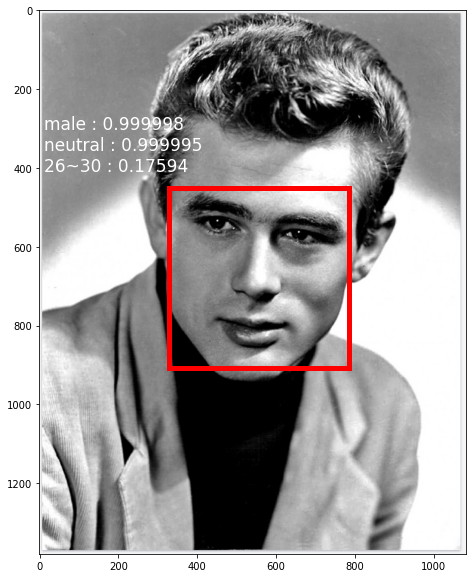

In [65]:
import matplotlib.patches as patches
img=mpimg.imread("../data/face_test_01.jpg")

fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)
plt.text(10, 400, annotation, wrap=True, fontsize=17, color='white')
plt.show()

In [55]:
print(annotation)

male : 0.999998
neutral : 0.999995
26~30 : 0.17594


In [92]:
url="https://openapi.naver.com/v1/vision/face"
files={"image":open("../data/face_test_02.jpg","rb")}
headers={"X-Naver-Client-Id":client_id,
        "X-Naver-Client-Secret":client_secret}
response=requests.post(url,files=files,headers=headers)
parsed=json.loads(response.text)
print(json.dumps(parsed,indent=4,sort_keys=False,ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1868,
            "height": 1252
        },
        "faceCount": 3
    },
    "faces": [
        {
            "roi": {
                "x": 833,
                "y": 453,
                "width": 208,
                "height": 208
            },
            "landmark": {
                "leftEye": {
                    "x": 889,
                    "y": 517
                },
                "rightEye": {
                    "x": 977,
                    "y": 513
                },
                "nose": {
                    "x": 928,
                    "y": 551
                },
                "leftMouth": {
                    "x": 892,
                    "y": 602
                },
                "rightMouth": {
                    "x": 975,
                    "y": 600
                }
            },
            "gender": {
                "value": "child",
                "confidence": 1.0
            },
            "

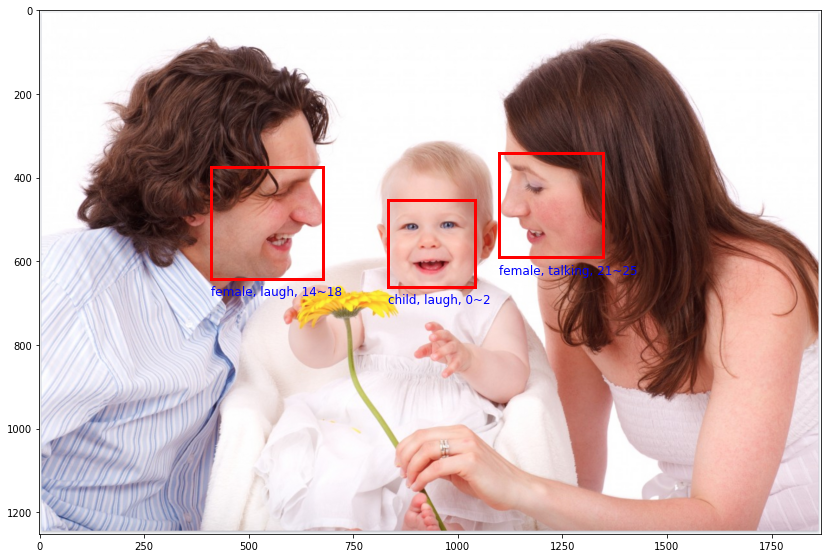

In [95]:

import matplotlib.patches as patches
img=mpimg.imread("../data/face_test_02.jpg")
fig,ax = plt.subplots(figsize=(14,10))
ax.imshow(img)
for each in parsed["faces"]:
    x,y,w,h=each["roi"].values()
    gender,gen_confidence=each["gender"].values()
    emotion,emotion_confidence=each["emotion"].values()
    age,age_confidence=each["age"].values()
    rect_face = patches.Rectangle((x,y),w,h,linewidth=3,edgecolor='r',facecolor='none')
    ant_letter=gender+", "+emotion+", "+age
    plt.text(x,y+h+40,ant_letter,size=12,color="blue")
    ax.add_patch(rect_face)
plt.show()

In [146]:
url="https://openapi.naver.com/v1/vision/face"
files={"image":open("../data/가나.jpg","rb")}
headers={"X-Naver-Client-Id":client_id,
        "X-Naver-Client-Secret":client_secret}
response=requests.post(url,files=files,headers=headers)
parsed=json.loads(response.text)
print(json.dumps(parsed,indent=4,sort_keys=False,ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 682,
            "height": 1440
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 275,
                "y": 542,
                "width": 251,
                "height": 251
            },
            "landmark": {
                "leftEye": {
                    "x": 346,
                    "y": 589
                },
                "rightEye": {
                    "x": 469,
                    "y": 606
                },
                "nose": {
                    "x": 416,
                    "y": 670
                },
                "leftMouth": {
                    "x": 350,
                    "y": 728
                },
                "rightMouth": {
                    "x": 443,
                    "y": 734
                }
            },
            "gender": {
                "value": "female",
                "confidence": 0.999963
            },
        

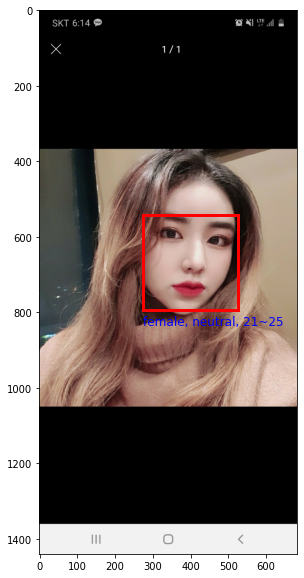

In [147]:
import matplotlib.patches as patches
img=mpimg.imread("../data/가나.jpg")
fig,ax = plt.subplots(figsize=(14,10))
ax.imshow(img)
for each in parsed["faces"]:
    x,y,w,h=each["roi"].values()
    gender,gen_confidence=each["gender"].values()
    emotion,emotion_confidence=each["emotion"].values()
    age,age_confidence=each["age"].values()
    rect_face = patches.Rectangle((x,y),w,h,linewidth=3,edgecolor='r',facecolor='none')
    ant_letter=gender+", "+emotion+", "+age
    plt.text(x,y+h+40,ant_letter,size=12,color="blue")
    ax.add_patch(rect_face)
plt.show()

In [148]:
import requests
client_id="ecP62hGiXJwVbQt8vvKo"
client_secret="oVTHQQ3s_P"
url="https://openapi.naver.com/v1/vision/celebrity"
files={"image":open("../data/가나.jpg","rb")}
headers={"X-Naver-Client-Id":client_id,
        "X-Naver-Client-Secret":client_secret}
response=requests.post(url,files=files,headers=headers)
#json은 java Script object
import json
parsed=json.loads(response.text)
print(json.dumps(parsed,indent=4,sort_keys=False,ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 682,
            "height": 1440
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "티파니",
                "confidence": 0.325141
            }
        }
    ]
}


In [ ]:
https://pinkwink.kr/1136